## Visualization of training set and resampled data ##

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

data_original = 'dataset_original.data'
data_resamp   = 'dataset_resamp.data'

d0 = pickle.load(open(data_original))
dr = pickle.load(open(data_resamp))

print 'Number of entries in original:%d\nresampled:%d'%(len(d0['tfeatures']), len(dr['tfeatures']))


print d0.keys()

Number of entries in original:6605
resampled:8619
['tfeatures', 'vclass', 'tclass', 'vfeatures']


In [2]:
# Visualization functions slightly modified

from matplotlib.colors import LogNorm
import matplotlib.gridspec as gsc

def make_plotvar(ax,x,y,xname='',yname='',contaminant=False,color='k',label='',marker='o', make_contour=False,
                xr=[-1,3],yr=[-1,3],edge=False):
    if make_contour:
        nbins = 20
        counts, ybins, xbins, image = ax.hist2d(x,
        y, bins=nbins, 
        cmap=plt.cm.Blues, normed=LogNorm(), 
        cmin=0.01, label=label, alpha=1.0,range=(xr,yr))
        ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3,
                  cmap=plt.cm.Blues)
    
        
    if contaminant:
        ax.plot(x,y,',',color='gray',alpha=.6,label=label)
    else:
        if edge:
            ax.plot(x,y,marker,color=color,alpha=.6,label=label,markersize=9,markeredgecolor='gray')
        else:
            ax.plot(x,y,marker,color=color,alpha=.6,label=label,markersize=9)
            
    ax.set_xlabel('dm j0660' if xname == 'dm_j0660' else xname,fontsize=30)
    ax.set_ylabel('dm j0660' if yname == 'dm_j0660' else yname,fontsize=30)
            
    return 1



def plot_parameterspace(xval, yval,xname_arr, yname_arr, class_arr,figname='fig',classes_names = ['Halpha','OIII+Hbeta','OII', 'contaminant']):
    
    plt.figure(figname,figsize=(30,30))

    #classes_names = ['Halpha','OIII+Hbeta','OII', 'contaminant']
    s_names = [r'H$\alpha$',r'H$\beta$+[O III]',r'[O II]']
    colors = plt.cm.Set1(np.linspace(0,1,9))
    suff = 'SDSS'
     
    ncax = len(xname_arr)
    ncay = len(yname_arr)
    
    grid = gsc.GridSpec(ncay,ncax)

    
    for i in range(ncax):
        xname = xname_arr[i]
        for j in range(ncay):
            yname= yname_arr[j]
            ax = plt.subplot(grid[j,i])
            if xname == yname:
                ax.plot([-100,100],[100,-100],'k-')
                ax.set_xticklabels([''])
                ax.set_yticklabels([''])
                if j == 0:
                    ax.set_ylabel(yname,fontsize=30)
                if i == ncax-1 and j == ncay-1:
                    ax.set_xlabel(xname,fontsize=30)
                continue
                
            iic = 0
            for ic in classes_names:
                mask = np.asarray(class_arr) == ic
                make_plotvar(ax,xval[mask,i],yval[mask,j],xname=xname,yname=yname,
                color=colors[iic],contaminant=True if ic == 'contaminant' else False,
                label=ic)


                iic +=1
                
            if i >0:
                ax.set_ylabel('')
            if j < ncay-1:
                ax.set_xlabel('')
            if j == 0 and i == 2:
                plt.legend(loc='upper center',fontsize=30,bbox_to_anchor=(0.5, 1.5),ncol=4)

    
    return 1
        
        

            



1

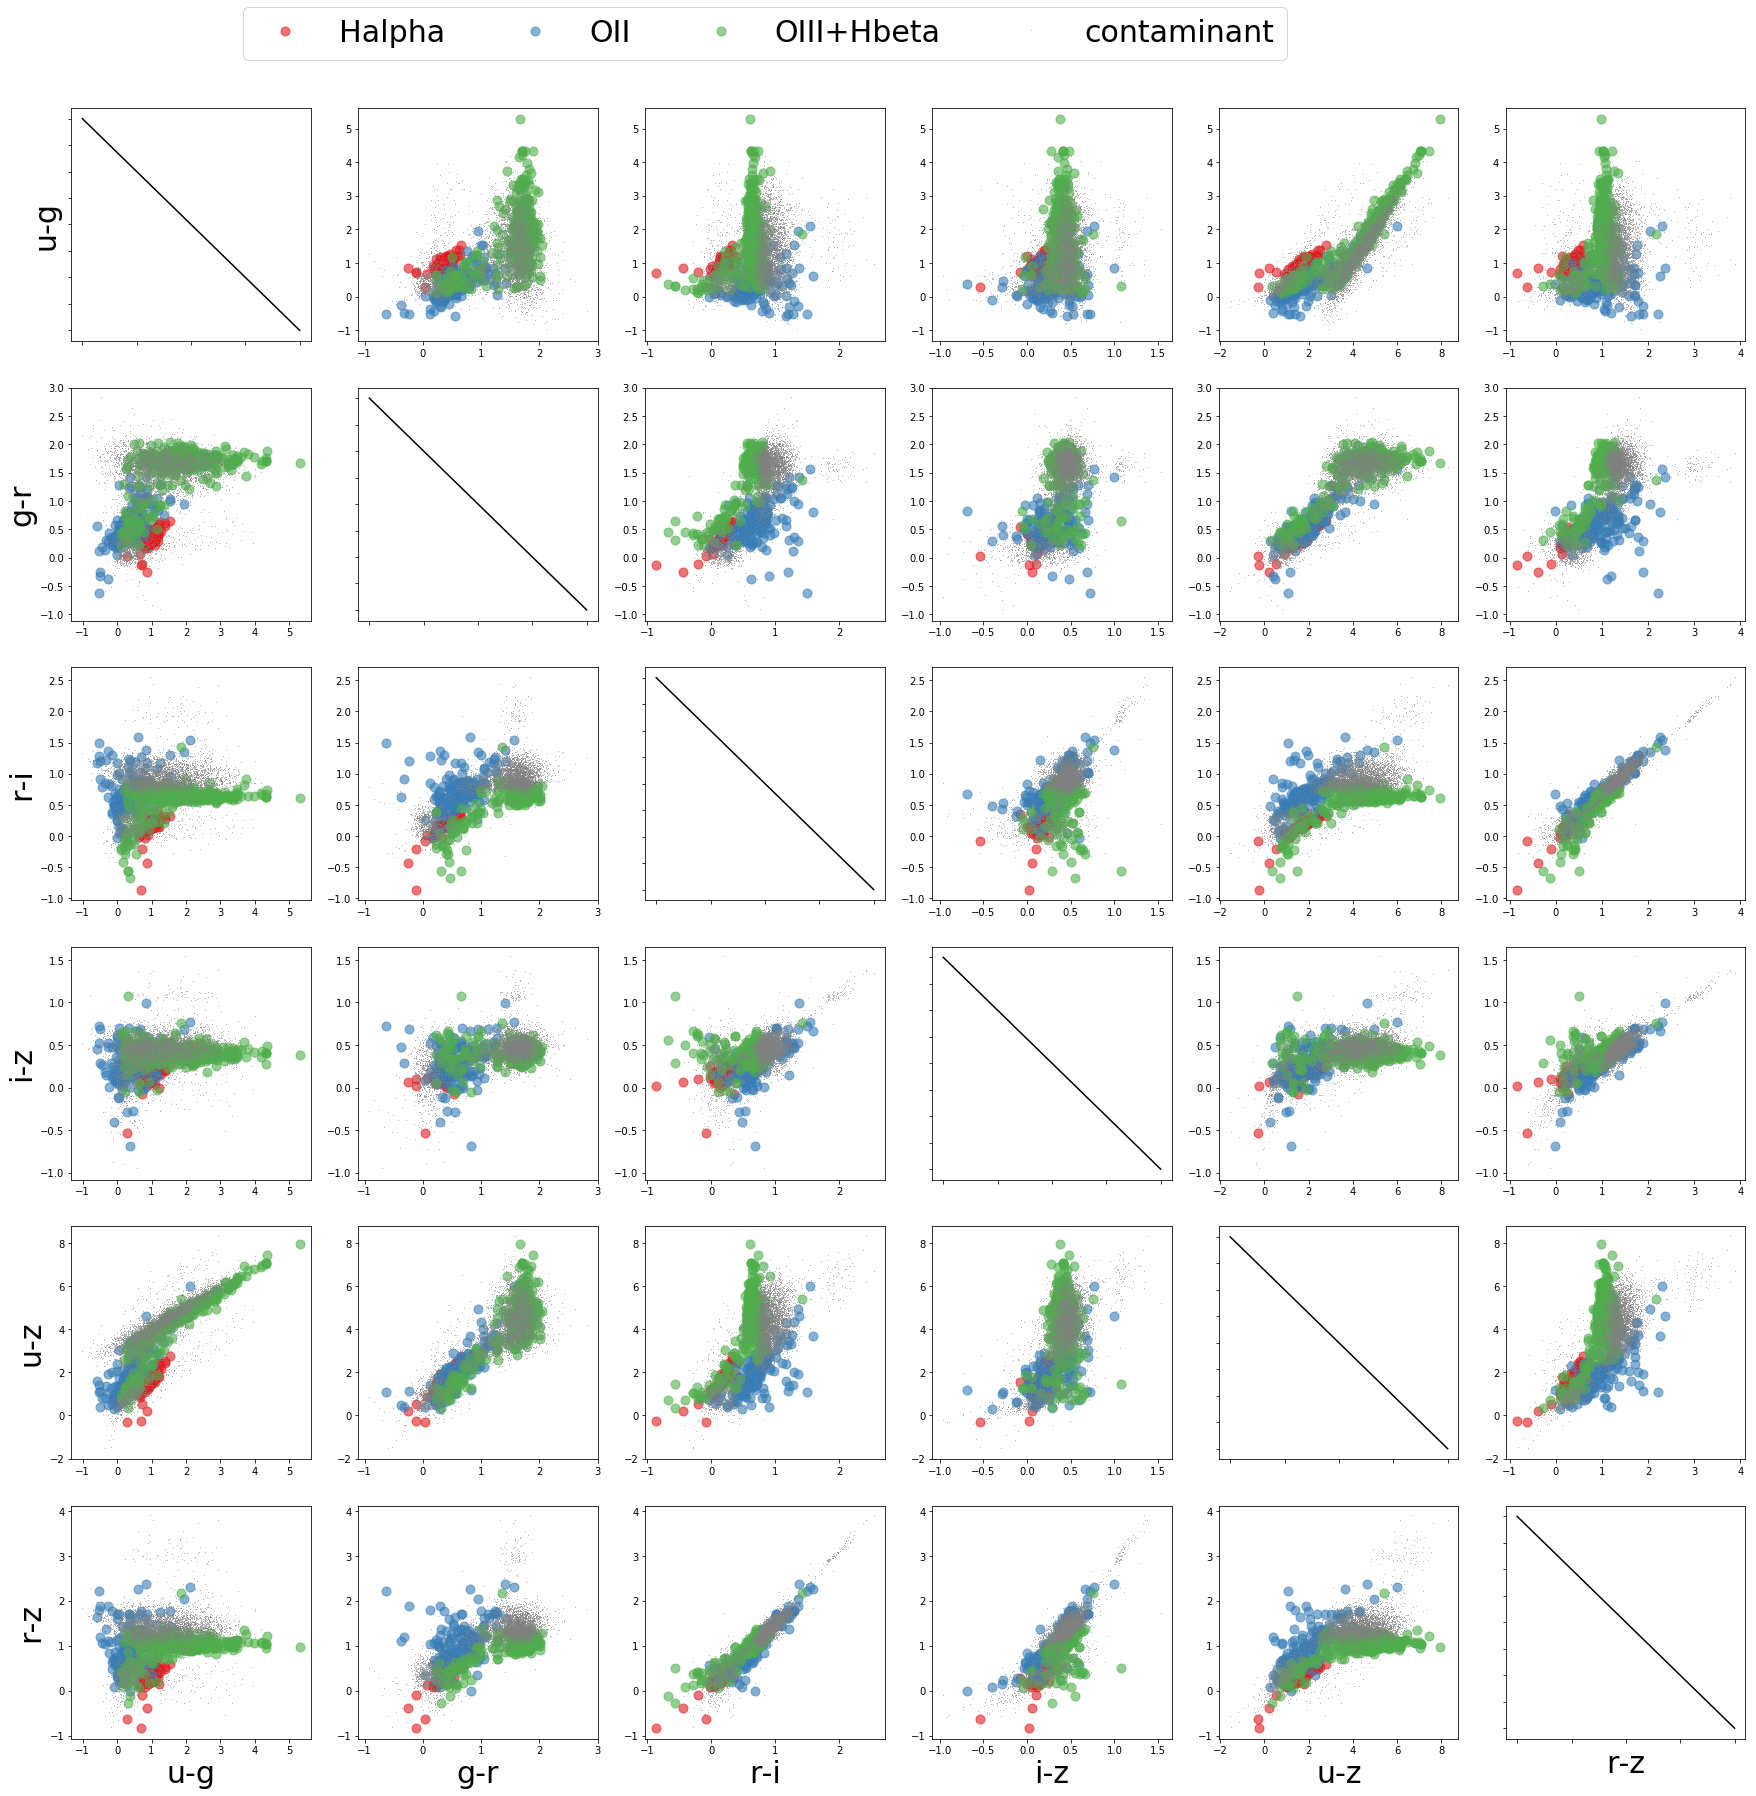

In [3]:
suff = 'SDSS'
feat_names = ['J0660-C^{r,g}', 'J0378','J0395', 'J0410','J0430','J0515', 'J0660',
            'J0861','u'+suff, 'g'+suff, 'r'+suff, 'i'+suff,'z'+suff, 'u-g','g-r','r-i','i-z','u-z','r-z']


allfeat = d0['tfeatures']
class_arr = d0['tclass']
ngal = len(class_arr)
all_classes = np.unique(class_arr)

colors = [13,14,15,16,17,18] #indices of colours
cnames = [feat_names[x] for x in colors]
ncol = len(colors)
coldata = np.zeros([ngal,ncol])
for i in range(ncol):
    icol = colors[i]
    coldata[:,i] = np.asarray([allfeat[x][icol] for x in range(ngal)])


    
plot_parameterspace(coldata,coldata,cnames,cnames,class_arr,classes_names = all_classes,figname='original')


  

1

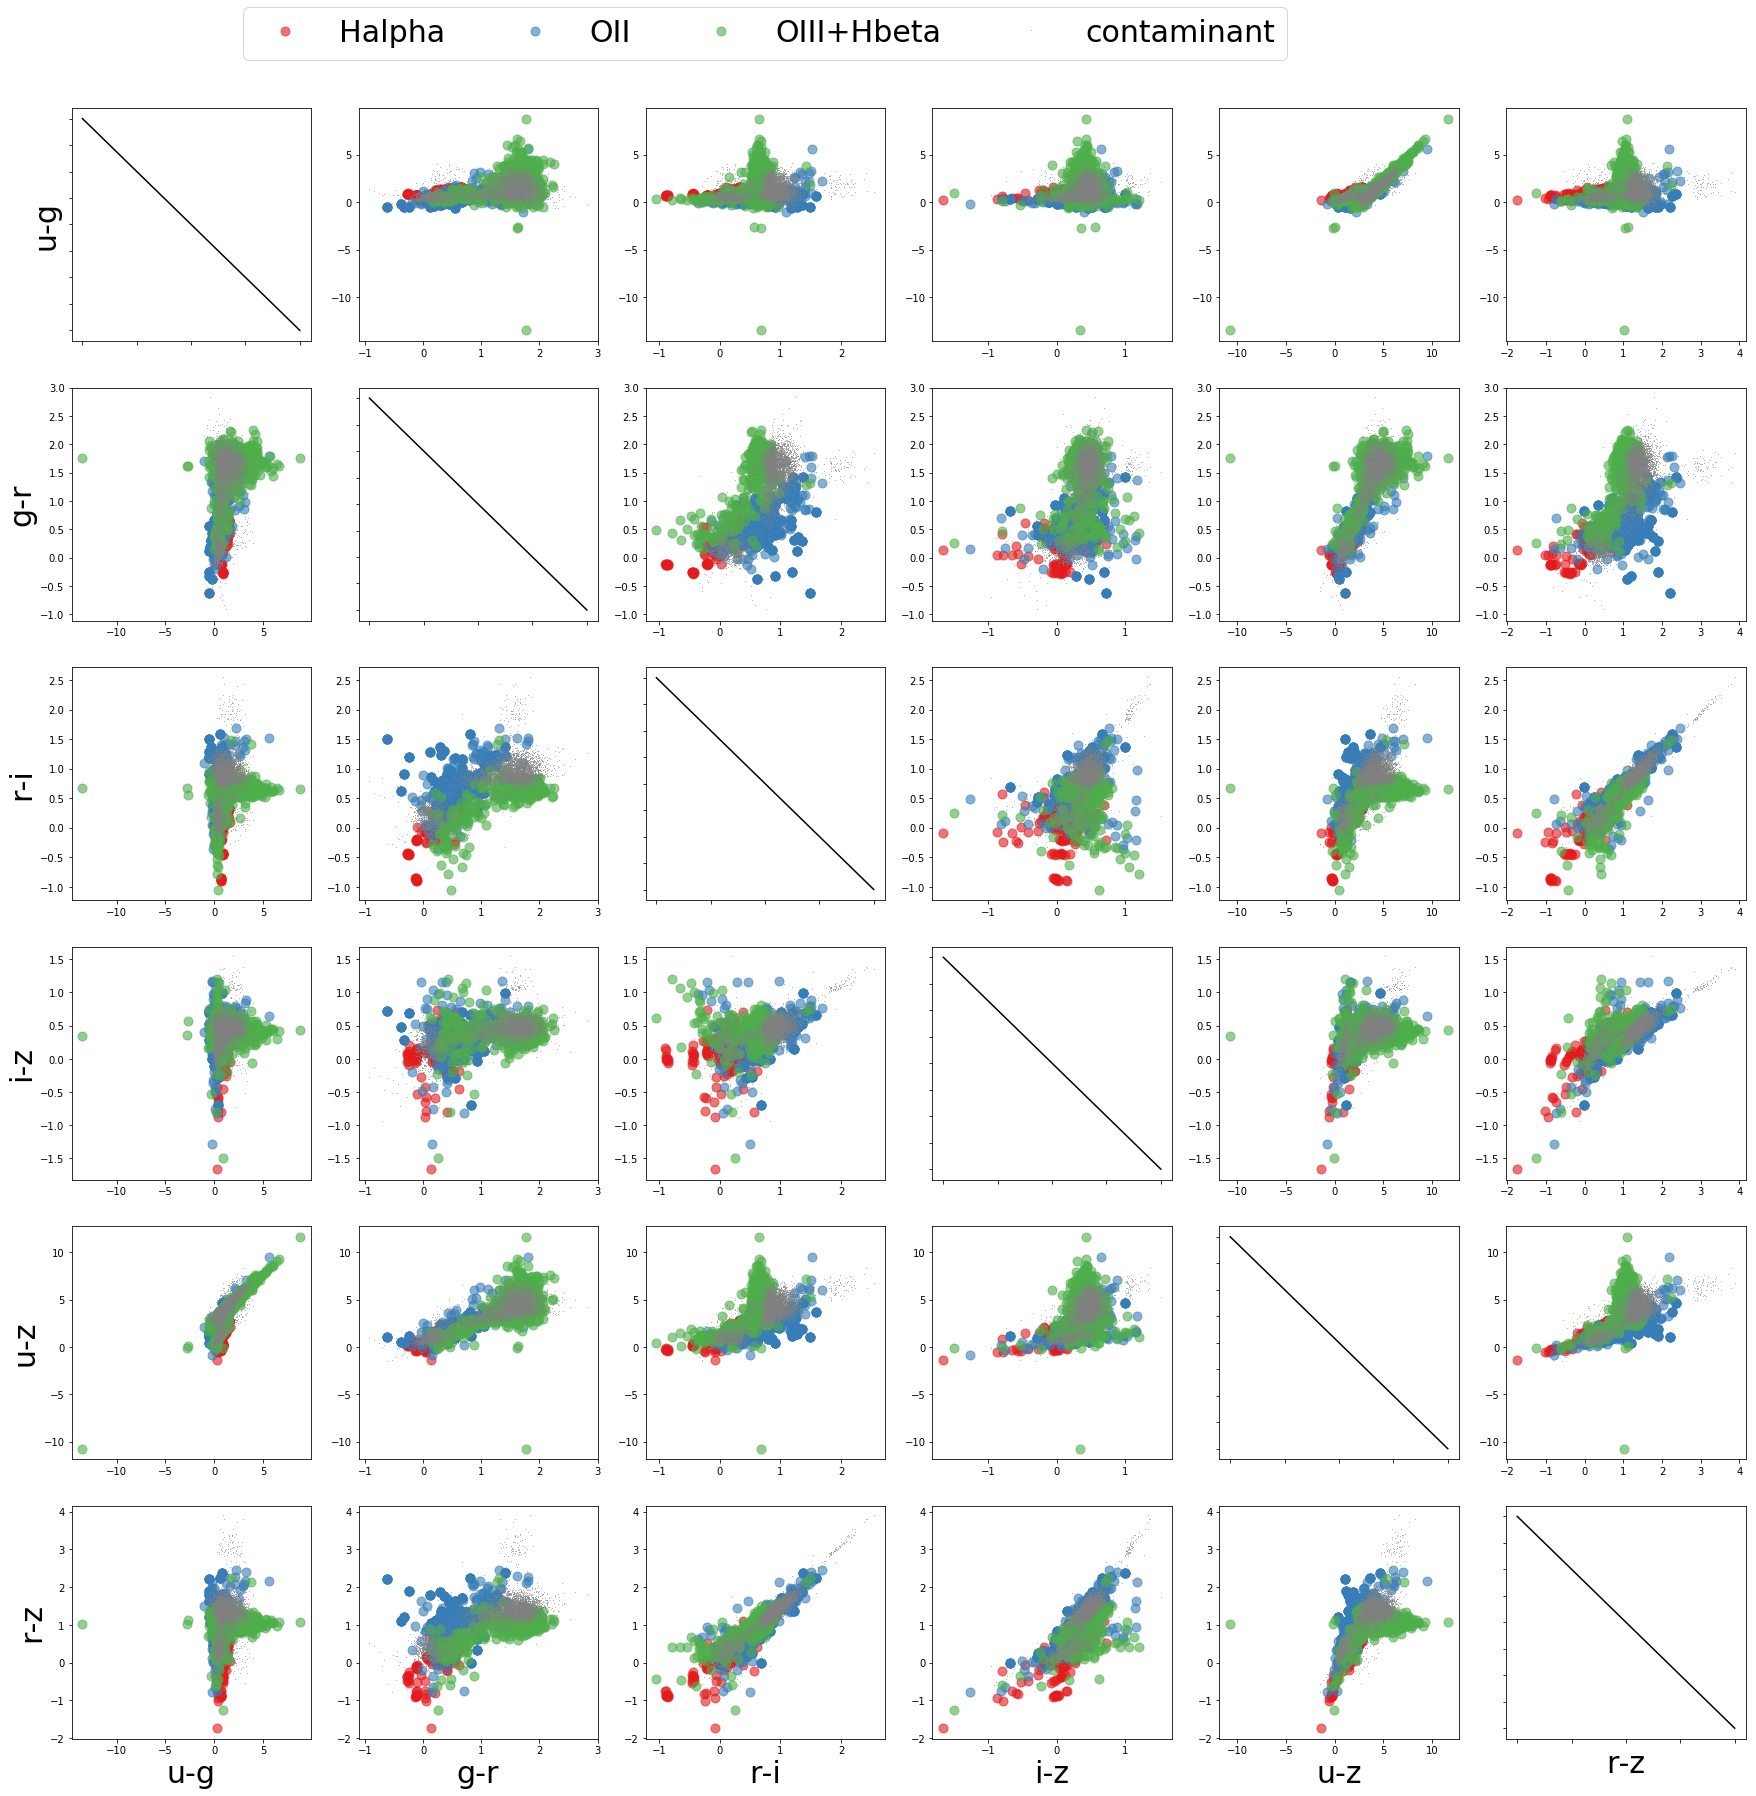

In [4]:
allfeat = dr['tfeatures']
class_arr = dr['tclass']
ngal = len(class_arr)
all_classes = np.unique(class_arr)

colors = [13,14,15,16,17,18] #indices of colours
cnames = [feat_names[x] for x in colors]
ncol = len(colors)
coldata = np.zeros([ngal,ncol])
for i in range(ncol):
    icol = colors[i]
    coldata[:,i] = np.asarray([allfeat[x][icol] for x in range(ngal)])

plot_parameterspace(coldata,coldata,cnames,cnames,class_arr,classes_names = all_classes,figname='resampled')


1

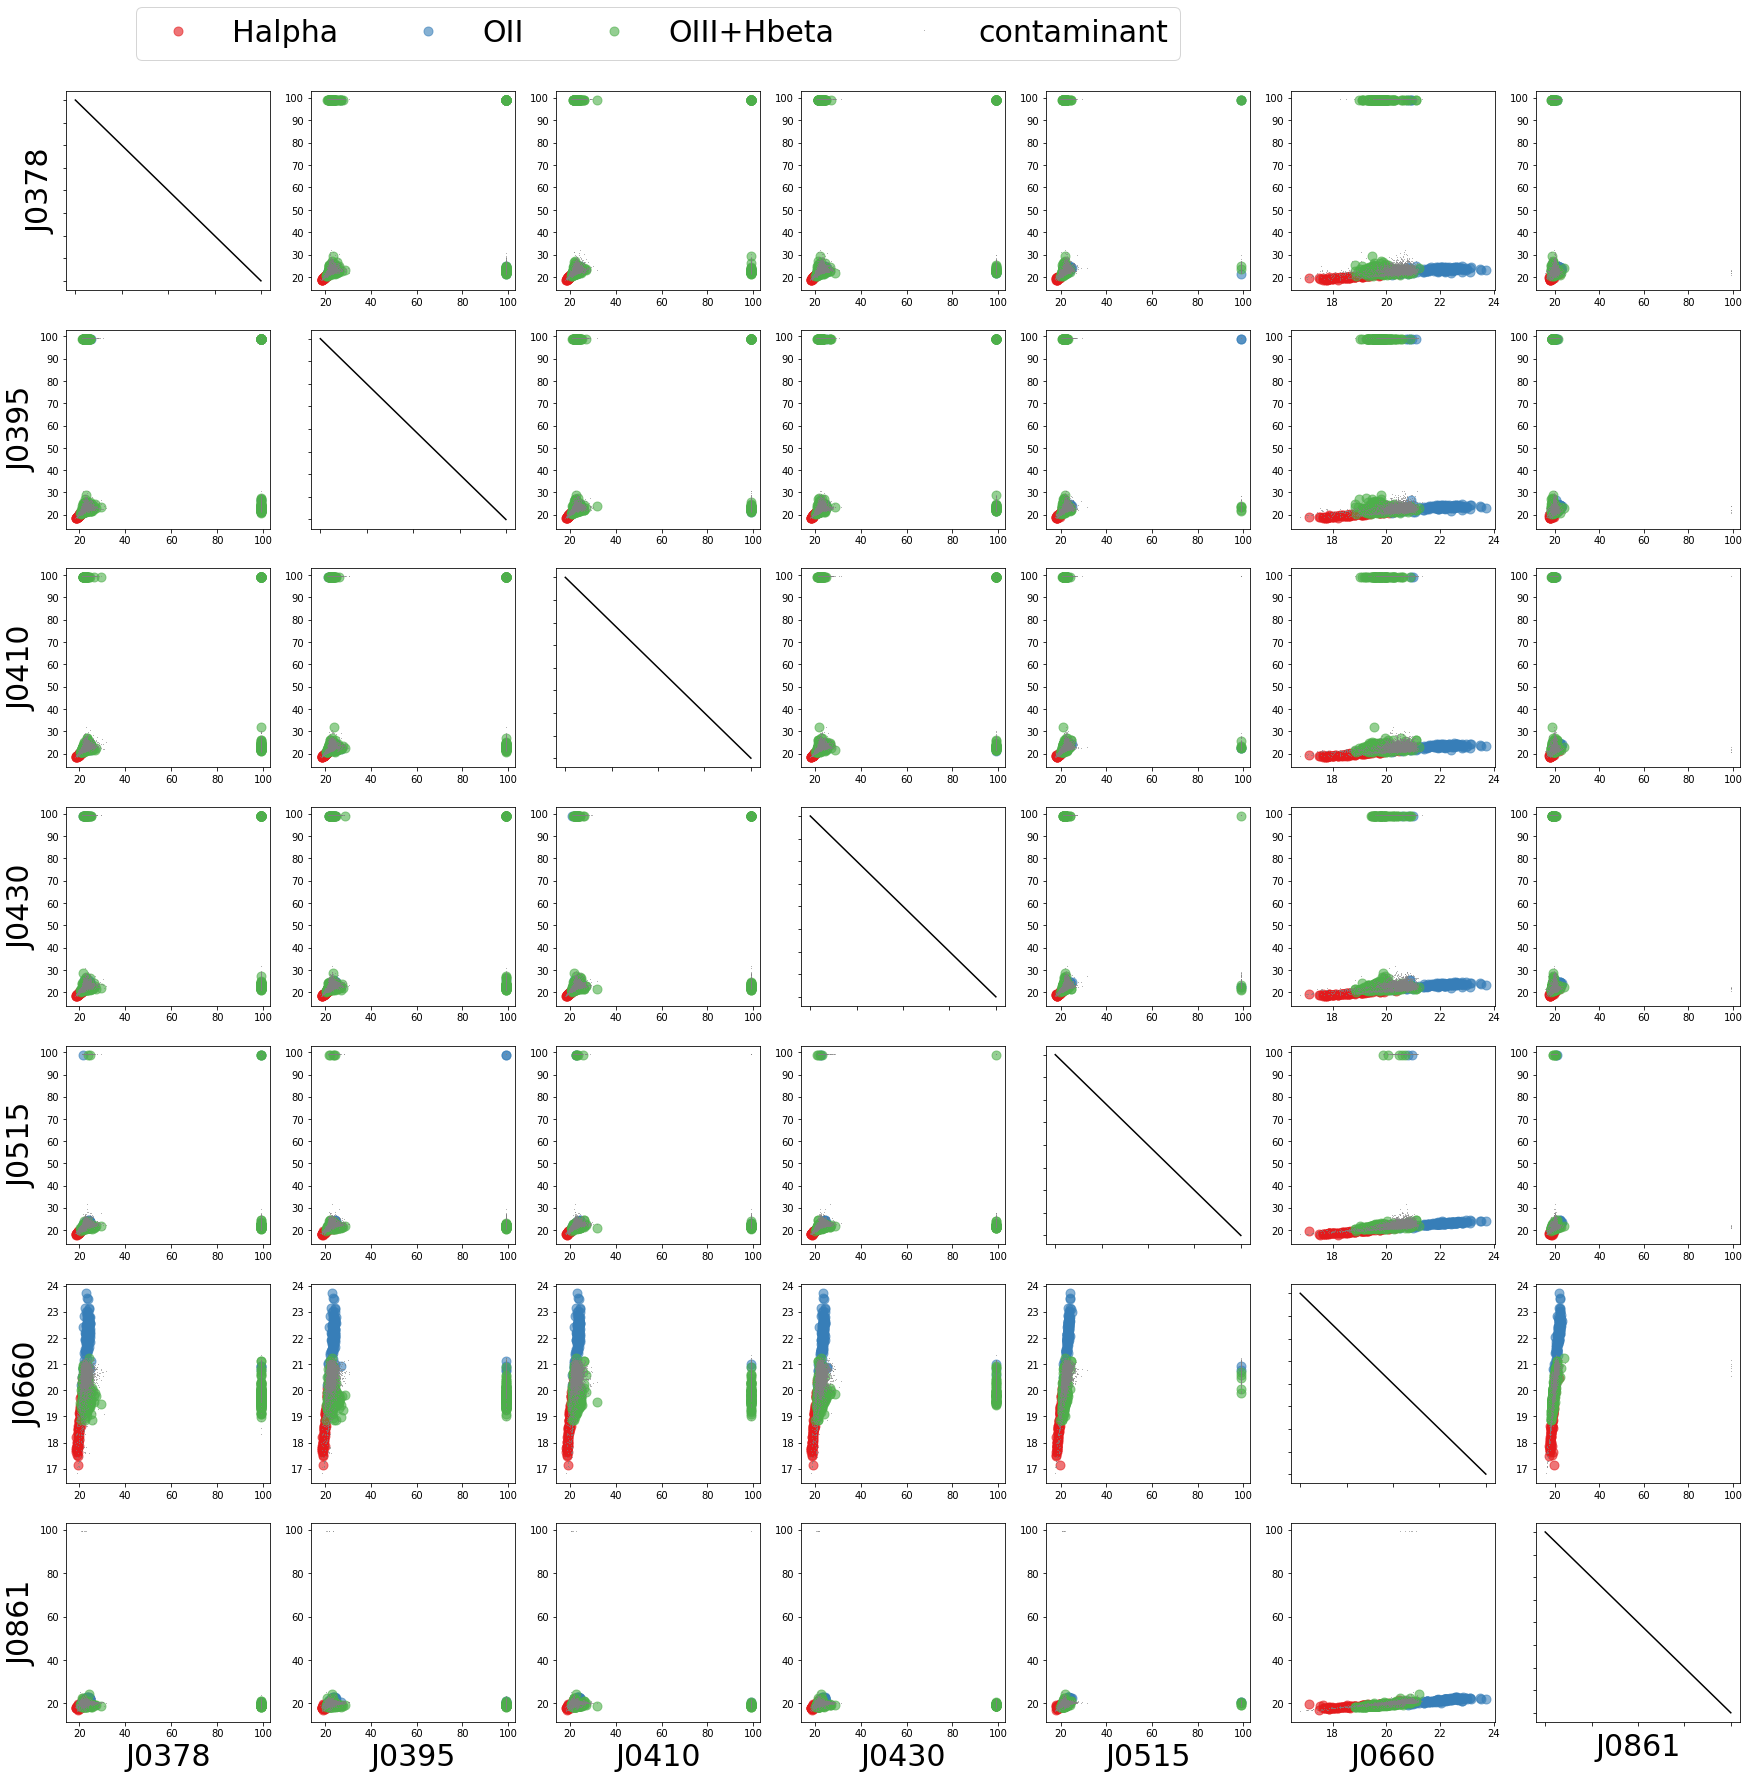

In [5]:
suff = 'SDSS'
feat_names = ['J0660-C^{r,g}', 'J0378','J0395', 'J0410','J0430','J0515', 'J0660',
            'J0861','u'+suff, 'g'+suff, 'r'+suff, 'i'+suff,'z'+suff, 'u-g','g-r','r-i','i-z','u-z','r-z']


allfeat = d0['tfeatures']
class_arr = d0['tclass']
ngal = len(class_arr)
all_classes = np.unique(class_arr)

colors = [1,2,3,4,5,6,7] #indices of colours
cnames = [feat_names[x] for x in colors]
ncol = len(colors)
coldata = np.zeros([ngal,ncol])
for i in range(ncol):
    icol = colors[i]
    coldata[:,i] = np.asarray([allfeat[x][icol] for x in range(ngal)])


    
plot_parameterspace(coldata,coldata,cnames,cnames,class_arr,classes_names = all_classes,figname='original')


  